<a href="https://colab.research.google.com/github/nitver90/Machine-Learning-Repo/blob/main/Household%20Power%20Consumption/household_power_consumption_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
### Making Index as DateTime 
dataset= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Household Data/household_power_consumption.txt",
                  sep = ";", parse_dates = {"DateTime" : ["Date","Time"]},
                  infer_datetime_format = True,
                  index_col = "DateTime", low_memory= False)

In [5]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
dataset= dataset.replace("?", "Nan")               ### Replacing ? with Nan values.

In [8]:
dataset.fillna(method= "ffill", inplace= True)     ### Filling Nan Values with forward fill method.

In [9]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
dataset= dataset.astype("float")                   ### Changing Datatype into float.
# dataset['Global_active_power'] = dataset['Global_active_power'].astype('float')
# dataset['Global_reactive_power'] = dataset['Global_reactive_power'].astype('float')
# dataset['Voltage'] = dataset['Voltage'].astype('float')
# dataset['Global_intensity'] = dataset['Global_intensity'].astype('float')
# dataset['Sub_metering_1'] = dataset['Sub_metering_1'].astype('float')
# dataset['Sub_metering_2'] = dataset['Sub_metering_2'].astype('float')

In [11]:
dataset["Total_Units"]= dataset["Sub_metering_1"]+dataset["Sub_metering_2"]+dataset["Sub_metering_3"]

In [12]:
data_hour=dataset.resample('h').sum()                   ### Converting Minute Data into Hour Basis for a better visualization.
data_hour.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Units
DateTime,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,626.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,1415.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,1087.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1058.0


 It is known that Voltage is constant nearly 230 Volts. so For visulization voltage will be considered as mean not sum.

In [13]:
data=dataset.reset_index()                               ### Resetting Index and forming DateTime as a Column

In [14]:
data.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Units
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


In [15]:
#dataset["Date"]= pd.to_datetime(dataset["dt"])
#dataset["Year"]= dataset["Date"].apply(lambda x: x.year)
#dataset["Month"]= dataset["Date"].apply(lambda x: x.month)
data["Month"]= pd.to_datetime(data["DateTime"]).dt.month
data["Year"]= pd.to_datetime(data["DateTime"]).dt.year
data["Hour"]=pd.to_datetime(data["DateTime"]).dt.hour


In [16]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Autnum'
    elif x in [12, 1]:
        season = 'Winter'
    elif x in [4, 5, 6]:
        season = 'Summer'
    elif x in [2,3]:
        season = 'Spring'
    elif x in [7,8]:
        season = 'Monsoon'
    return season

In [17]:
data["Season"]= data["Month"].apply(month2seasons)

In [18]:
data.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Units,Month,Year,Hour,Season
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0,12,2006,17,Winter
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0,12,2006,17,Winter
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0,12,2006,17,Winter
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0,12,2006,17,Winter
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0,12,2006,17,Winter


In [19]:
data.groupby(["Month"]).mean().round(2)                     

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Units,Year,Hour
Month,,,,,,,,,,
1,1.46,0.11,242.18,6.14,1.41,1.55,7.99,10.75,2008.50,11.50
2,1.30,0.10,241.46,5.45,1.13,1.39,7.58,10.11,2008.50,11.50
3,1.23,0.11,241.53,5.18,1.27,1.66,6.86,9.86,2008.50,11.50
4,1.05,0.12,241.04,4.42,1.08,1.17,6.53,8.93,2008.50,11.50
5,1.03,0.13,239.01,4.40,1.23,1.31,6.70,9.24,2008.50,11.50
6,0.91,0.15,239.91,3.93,1.33,1.24,6.07,8.75,2008.50,11.50
7,0.70,0.15,240.00,3.06,0.71,0.99,4.27,5.98,2008.50,11.50
8,0.57,0.14,240.17,2.51,0.51,0.80,3.73,5.17,2008.50,11.50
9,0.98,0.13,240.45,4.17,1.16,1.18,6.19,8.70,2008.50,11.50


Here We are not interested in Year and Hour Columns for visulization.

### Visualization Based on Months

##### Global_active_power Vs Months Visualiziation

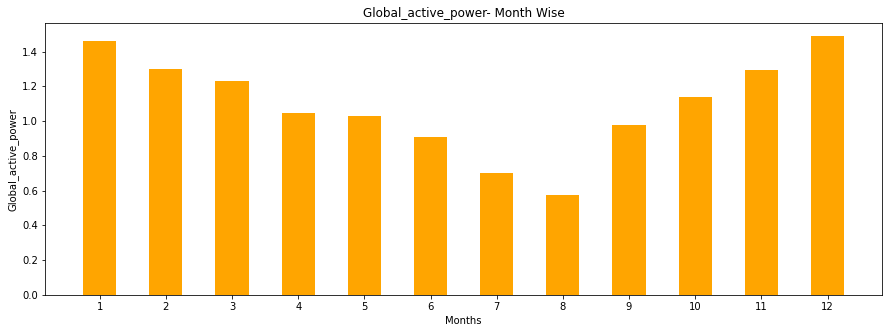

In [20]:
fig = plt.figure(figsize = (15, 5)) 
years= range(1,13)
plt.bar(years,data.groupby(["Month"]).mean()["Global_active_power"] , color=['orange'], width = 0.5)  
plt.xticks(years)
plt.xlabel("Months") 
plt.ylabel("Global_active_power") 
plt.title("Global_active_power- Month Wise") 
plt.show()

#### Global_reactive_power Vs Months Visualiziation

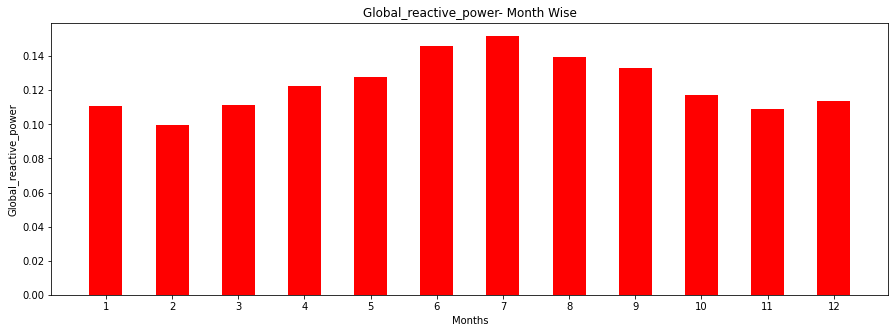

In [21]:
fig = plt.figure(figsize = (15, 5)) 
years= range(1,13)
plt.bar(years,data.groupby(["Month"]).mean()["Global_reactive_power"] , color=['red'], width = 0.5)  
plt.xticks(years)
plt.xlabel("Months") 
plt.ylabel("Global_reactive_power") 
plt.title("Global_reactive_power- Month Wise") 
plt.show()

#### Global_intensity Vs Months visualization

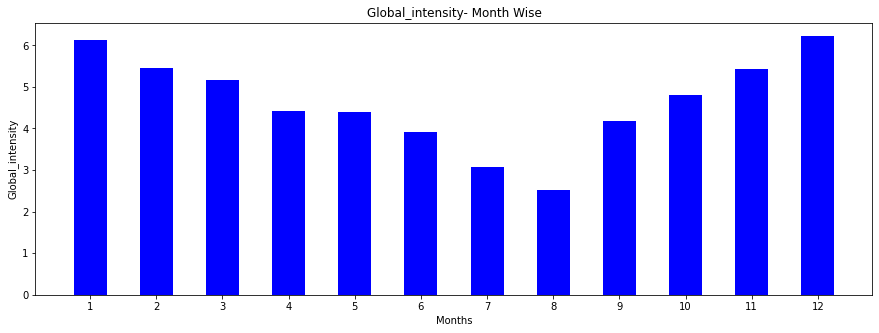

In [22]:
fig = plt.figure(figsize = (15, 5)) 
years= range(1,13)
plt.bar(years,data.groupby(["Month"]).mean()["Global_intensity"] , color=['blue'], width = 0.5)  
plt.xticks(years)
plt.xlabel("Months") 
plt.ylabel("Global_intensity") 
plt.title("Global_intensity- Month Wise") 
plt.show()

#### Total Units (All 3 Meter Readings) Vs Months Visualization

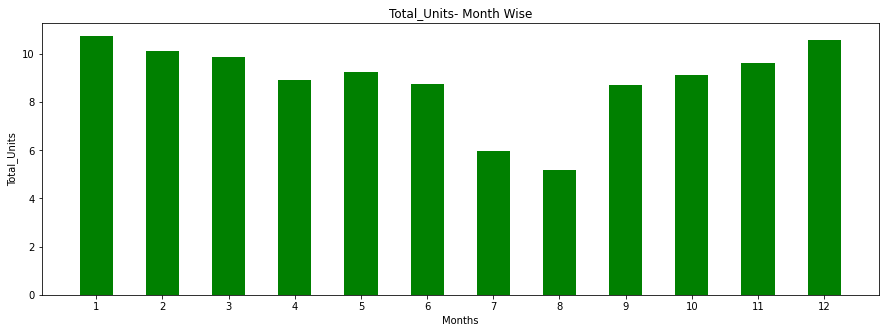

In [23]:
fig = plt.figure(figsize = (15, 5)) 
years= range(1,13)
plt.bar(years,data.groupby(["Month"]).mean()["Total_Units"] , color='g', width = 0.5)  
plt.xticks(years)
plt.xlabel("Months") 
plt.ylabel("Total_Units") 
plt.title("Total_Units- Month Wise") 
plt.show()

#### Voltage Variations in Months (Almost Constant)

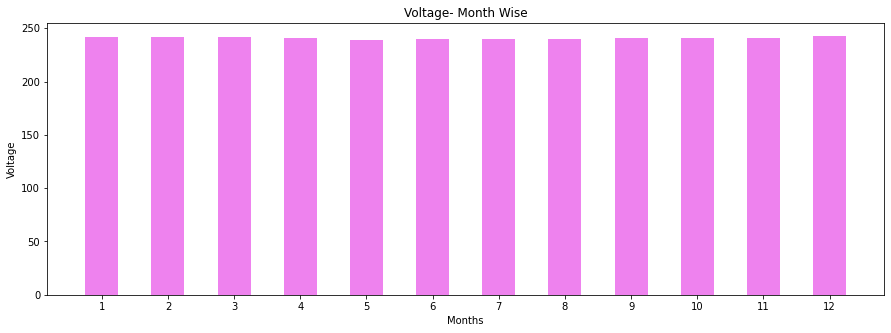

In [24]:
fig = plt.figure(figsize = (15, 5)) 
years= range(1,13)
plt.bar(years,data.groupby(["Month"]).mean()["Voltage"] , color='violet', width = 0.5)  
plt.xticks(years)
plt.xlabel("Months") 
plt.ylabel("Voltage") 
plt.title("Voltage- Month Wise") 
plt.show()

In [25]:
data.groupby(["Year"]).mean().round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Units,Month,Hour
Year,,,,,,,,,,
2006,1.90,0.13,241.44,8.03,1.25,2.21,7.41,10.87,12.00,11.66
2007,1.12,0.12,239.38,4.76,1.23,1.64,5.75,8.66,6.53,11.50
2008,1.07,0.12,240.63,4.55,1.11,1.26,6.04,8.40,6.51,11.50
2009,1.08,0.13,241.89,4.56,1.14,1.14,6.78,9.10,6.53,11.50
2010,1.06,0.13,241.52,4.48,0.99,1.10,7.13,9.33,5.96,11.50


### Visualization Based on Years

#### Global_active_power Vs Years Visualiziation

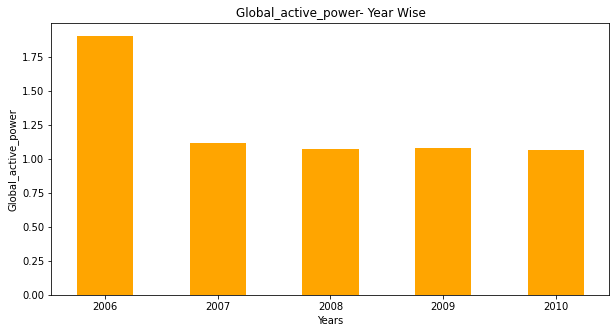

In [26]:
fig = plt.figure(figsize = (10, 5)) 
years= range(2006,2011)
plt.bar(years,data.groupby(["Year"]).mean()["Global_active_power"] , color=['orange'], width = 0.5) 
plt.xticks(years)
plt.xlabel("Years") 
plt.ylabel("Global_active_power") 
plt.title("Global_active_power- Year Wise") 
plt.show()

#### Global_reactive_power Vs Years Visualiziation

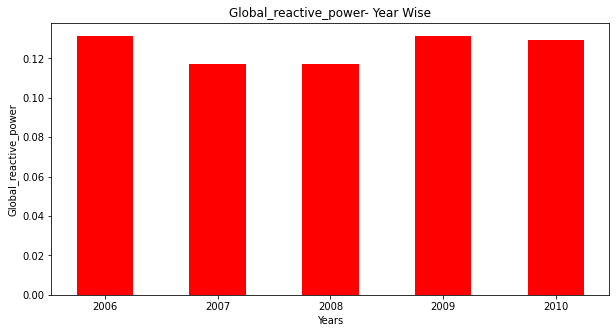

In [27]:
fig = plt.figure(figsize = (10, 5)) 
years= range(2006,2011)
plt.bar(years,data.groupby(["Year"]).mean()["Global_reactive_power"] , color='r', width = 0.5) 
plt.xticks(years)
plt.xlabel("Years") 
plt.ylabel("Global_reactive_power") 
plt.title("Global_reactive_power- Year Wise") 
plt.show()

#### Global_intensity Vs Years visualization

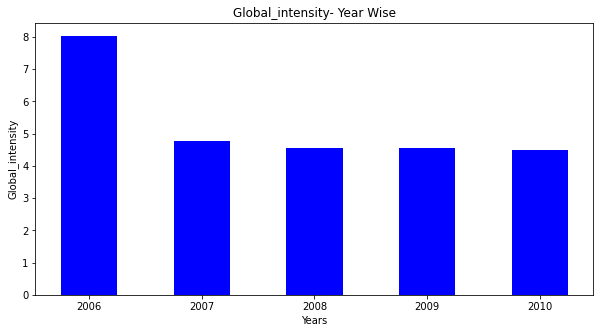

In [28]:
fig = plt.figure(figsize = (10, 5)) 
years= range(2006,2011)
plt.bar(years,data.groupby(["Year"]).mean()["Global_intensity"] , color=['blue'], width = 0.5) 
plt.xticks(years)
plt.xlabel("Years") 
plt.ylabel("Global_intensity") 
plt.title("Global_intensity- Year Wise") 
plt.show()

#### Total Units (All 3 Meter Readings) Vs Years Visualization

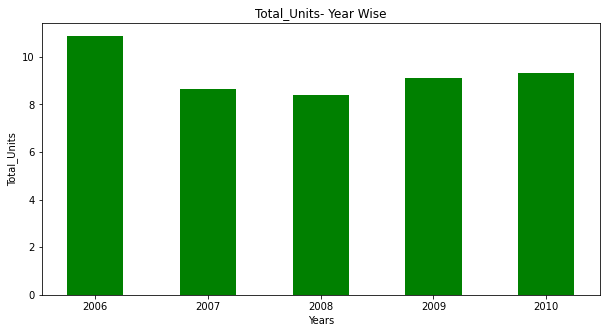

In [29]:
fig = plt.figure(figsize = (10, 5)) 
years= range(2006,2011)
plt.bar(years,data.groupby(["Year"]).mean()["Total_Units"] , color=['green'], width = 0.5) 
plt.xticks(years)
plt.xlabel("Years") 
plt.ylabel("Total_Units") 
plt.title("Total_Units- Year Wise") 
plt.show()

#### Voltage Variation Yearly (Almost Constant)

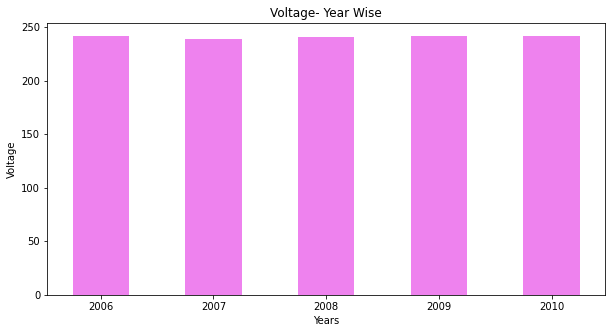

In [30]:
fig = plt.figure(figsize = (10, 5)) 
years= range(2006,2011)
plt.bar(years,data.groupby(["Year"]).mean()["Voltage"] , color=['violet'], width = 0.5) 
plt.xticks(years)
plt.xlabel("Years") 
plt.ylabel("Voltage") 
plt.title("Voltage- Year Wise") 
plt.show()

### Season Wise Visualization

In [31]:
data.groupby(["Season"]).mean().round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Units,Month,Year,Hour
Season,,,,,,,,,,,
Autnum,1.13,0.12,240.76,4.80,1.17,1.34,6.58,9.15,9.99,2008.48,11.50
Monsoon,0.64,0.15,240.09,2.79,0.61,0.90,4.00,5.58,7.50,2008.50,11.50
Spring,1.26,0.11,241.50,5.31,1.20,1.53,7.21,9.98,2.52,2008.50,11.50
Summer,1.00,0.13,239.97,4.25,1.21,1.24,6.44,8.98,5.00,2008.50,11.50
Winter,1.48,0.11,242.45,6.18,1.36,1.50,7.91,10.66,6.13,2008.14,11.51


#### Global_active_power Vs Seasons Visualiziation

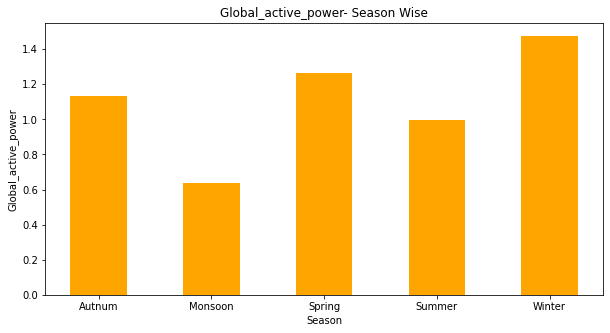

In [38]:
fig = plt.figure(figsize = (10, 5)) 
Seasons= ['Autnum', 'Monsoon', 'Spring', 'Summer','Winter']
plt.bar(Seasons,data.groupby(["Season"]).mean()["Global_active_power"] , color='orange', width =0.50) 
plt.xticks(Seasons)
plt.xlabel("Season") 
plt.ylabel("Global_active_power") 
plt.title("Global_active_power- Season Wise") 
plt.show()

#### Global_reactive_power Vs Seasons Visualiziation

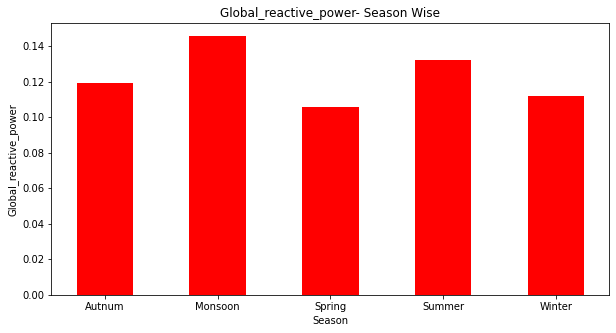

In [33]:
fig = plt.figure(figsize = (10, 5)) 
Seasons= ['Autnum', 'Monsoon', 'Spring', 'Summer','Winter']
plt.bar(Seasons,data.groupby(["Season"]).mean()["Global_reactive_power"] , color='r', width =0.50) 
plt.xticks(Seasons)
plt.xlabel("Season") 
plt.ylabel("Global_reactive_power") 
plt.title("Global_reactive_power- Season Wise") 
plt.show()

#### Global_intensity Vs Years visualization


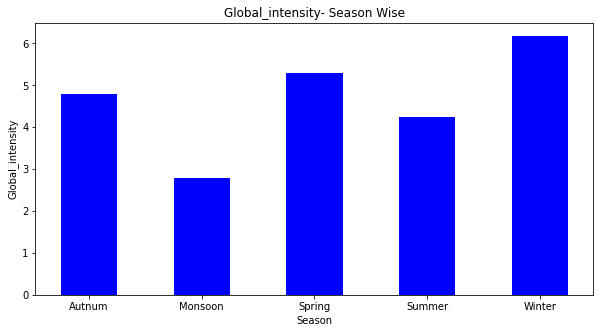

In [34]:
fig = plt.figure(figsize = (10, 5)) 
Seasons= ['Autnum', 'Monsoon', 'Spring', 'Summer','Winter']
plt.bar(Seasons,data.groupby(["Season"]).mean()["Global_intensity"] , color='b', width =0.50) 
plt.xticks(Seasons)
plt.xlabel("Season") 
plt.ylabel("Global_intensity") 
plt.title("Global_intensity- Season Wise") 
plt.show()

#### Total Units (All 3 Meter Readings) Vs Season Visualization

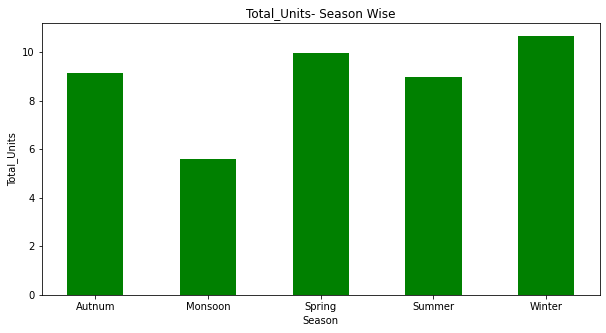

In [35]:
fig = plt.figure(figsize = (10, 5)) 
Seasons= ['Autnum', 'Monsoon', 'Spring', 'Summer','Winter']
plt.bar(Seasons,data.groupby(["Season"]).mean()["Total_Units"] , color='g', width =0.50) 
plt.xticks(Seasons)
plt.xlabel("Season") 
plt.ylabel("Total_Units") 
plt.title("Total_Units- Season Wise") 
plt.show()

#### Voltage Variation Season Wise (Almost Constant)

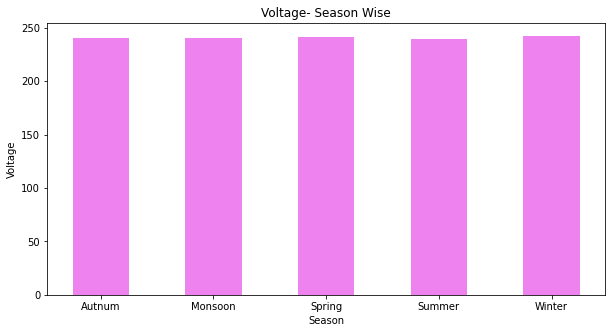

In [36]:
fig = plt.figure(figsize = (10, 5)) 
Seasons= ['Autnum', 'Monsoon', 'Spring', 'Summer','Winter']
plt.bar(Seasons,data.groupby(["Season"]).mean()["Voltage"] , color='violet', width =0.50) 
plt.xticks(Seasons)
plt.xlabel("Season") 
plt.ylabel("Voltage") 
plt.title("Voltage- Season Wise") 
plt.show()

#### Global_active_power Vs Global Intensity Visualization (Linear)

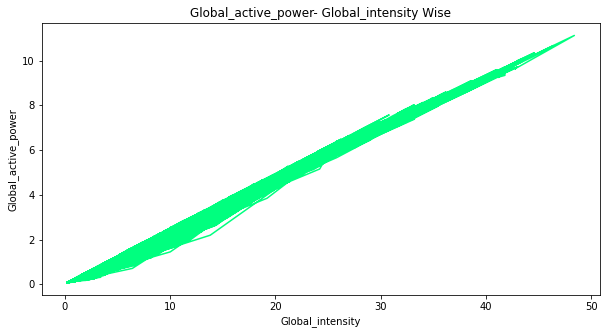

In [37]:
fig = plt.figure(figsize = (10, 5)) 
plt.plot(data["Global_intensity"],data["Global_active_power"] , color='springgreen') 
plt.xlabel("Global_intensity") 
plt.ylabel("Global_active_power") 
plt.title("Global_active_power- Global_intensity Wise") 
plt.show()